In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.svm import SVR

In [5]:
df = pd.read_csv('../data/all_monthly_data_clean.csv')
df.columns

Index(['year', 'month', 'population', 'unemployment_rate',
       'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'imports_yoy',
       'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_personal_income',
      

## Modelling

In [23]:
lr = LinearRegression()
X = df.drop()
y_saving_ratio = df['Personal saving as a percentage of disposable personal income']
y_saving = df['Equals: Personal saving']
y_disp_inc = df['Disposable personal income, current dollars']

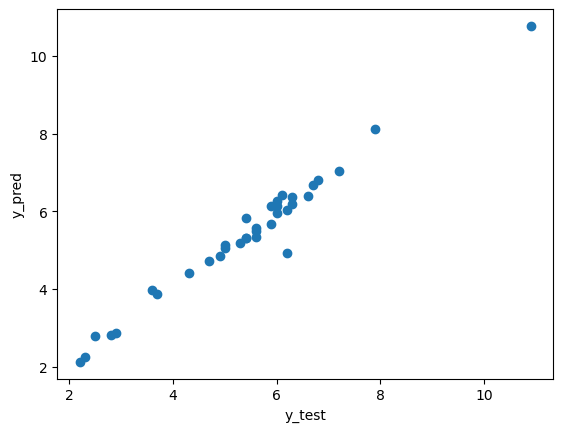

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_saving_ratio, random_state=42, test_size=0.15)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


In [27]:
print(f"Train cv: {cross_val_score(lr, X_train, y_train, cv = 10).mean()}")
print(f"Train r2: {lr.score(X_train, y_train)}")
print(f"Test r2: {lr.score(X_test, y_test)}")

Train cv: 0.972907802140693
Train r2: 0.9845941777252735
Test r2: 0.972560953086523


In [14]:
coef_flat = lr.coef_.flatten() if lr.coef_.ndim > 1 else lr.coef_

coef_df = pd.DataFrame(coef_flat, index=X.columns, columns=['Coefficient'])

print(coef_df)

                                                     Coefficient
Personal consumption expenditures                  -83855.370318
Personal interest payments                          -1508.826692
Personal current transfer payments                    829.791432
To government                                       -1088.946846
Population (midperiod, thousands)                       0.602639
Veterans' benefits                                      0.511948
Medicare                                                2.290880
Medicaid                                               -0.765057
Employer contributions for employee pension and...      0.476738
Employer contributions for government social in...      0.554307
Unemployment insurance                                 -0.144522
Personal income receipts on assets                   4286.383621
Personal interest income                            -1704.476171
Personal dividend income                            -2680.510351
Social security          